Q1

In [ ]:
! pip install requests
! pip install bs4

In [100]:
import requests
from bs4 import BeautifulSoup
import json

def scrape_imdb_reviews(movie_url, movie_name):
    """Scrape reviews from a single IMDb movie page"""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    response = requests.get(movie_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    reviews = []
    
    # Find review containers
    review_containers = soup.select('[data-testid*="review-card-parent"]')
    
    print(f"Found {len(review_containers)} reviews for {movie_name}")
    
    for container in review_containers:
        review_data = {}
        
        # Add movie name as separate attribute
        review_data['movie'] = movie_name
        
        # Review content (clean, without movie title)
        content_elem = container.select_one('.ipc-html-content-inner-div')
        review_data['review_text'] = content_elem.get_text(strip=True) if content_elem else ''
        
        # Rating
        rating_elem = container.select_one('.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--otherUserAlt.review-rating')
        if rating_elem:
            rating_text = rating_elem.get_text(strip=True)
            # Extract number from rating text
            import re
            rating_match = re.search(r'(\d+)', rating_text)
            review_data['rating'] = rating_match.group(1) if rating_match else rating_text
        else:
            review_data['rating'] = ''
        
        # Only add if we have content and rating
        if review_data['review_text'] and review_data['rating']:
            reviews.append(review_data)
    
    print(f"Extracted {len(reviews)} valid reviews for {movie_name}")
    return reviews

# URLs for both movies
movies = [
    {
        'url': 'https://www.imdb.com/title/tt1022603/reviews/?ref_=tt_ov_ururv&spoilers=EXCLUDE',
        'name': '500 Days of Summer'
    },
    {
        'url': 'https://www.imdb.com/title/tt3783958/reviews/?ref_=tt_ov_ururv&spoilers=EXCLUDE', 
        'name': 'La La Land'
    }
]

all_reviews = []

# Scrape reviews from both movies
for movie in movies:
    movie_reviews = scrape_imdb_reviews(movie['url'], movie['name'])
    all_reviews.extend(movie_reviews)

print(f"\nTotal reviews collected: {len(all_reviews)}")

# Ensure exactly 30 reviews
all_reviews = all_reviews[:30]

# Create JSON structure
data = {
    'movies': ['500 Days of Summer', 'La La Land'],
    'imdb_ids': ['tt1022603', 'tt3783958'],
    'total_reviews': len(all_reviews),
    'reviews': all_reviews
}

# Save to JSON
with open('imdb_reviews_combined.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

print(f"Saved combined dataset with exactly {len(all_reviews)} reviews")


Found 25 reviews for 500 Days of Summer
Extracted 22 valid reviews for 500 Days of Summer
Found 25 reviews for La La Land
Extracted 23 valid reviews for La La Land

Total reviews collected: 45
Saved combined dataset with exactly 30 reviews


Q2

In [101]:
import re

# 1. Only alphabetic characters
print("\n1. Only alphabetic characters")
pattern = r'^[a-zA-Z]+$'
tests = ["Python", "DataScience", "Hello123"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 2. Words beginning with consonant
print("\n2. Words beginning with consonant")
pattern = r'\b[bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ]\w*'
tests = ["cat", "elephant", "dog", "owl"]
for test_str in tests:
    match = bool(re.search(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 3. Valid domain name
print("\n3. Valid domain name")
pattern = r'^(?:[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?\.)+[a-zA-Z]{2,}$'
tests = ["openai.org", "invalid@site", "my-site.net"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 4. Extract all numbers
print("\n4. Extract all numbers")
pattern = r'\d+'
text = "He scored 45 goals in 2022 and 10 goals in 2023."
matches = re.findall(pattern, text)
print(f"  Text: '{text}'")
print(f"  Extracted numbers: {matches}")

# 5. Valid file paths with extensions
print("\n5. Valid file paths with extensions")
pattern = r'^[^\s]+\.(txt|csv|jpg)$'
tests = ["/home/user/file.txt", "report.doc", "/tmp/image.jpg"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 6. Canadian postal code
print("\n6. Canadian postal code")
pattern = r'^[A-Za-z]\d[A-Za-z] \d[A-Za-z]\d$'
tests = ["K1A 0B1", "123 456"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 7. First and last characters identical
print("\n7. First and last characters identical")
pattern = r'^(.).*\1$'
tests = ["level", "stats", "world"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 8. Password validation
print("\n8. Password validation")
pattern = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*?&#])[A-Za-z\d@$!%*?&#]{10,}$'
tests = ["Secure123!", "weakpass", "ValidPass#2023"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 9. Date format validation
print("\n9. Date format validation")
pattern = r'^(?:(0[1-9]|1[0-2])/(0[1-9]|[12]\d|3[01])/\d{4}|\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))$'
tests = ["07/04/2021", "2022-12-31", "2022/12/31"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")

# 10. IPv6 address validation
print("\n10. IPv6 address validation")
pattern = r'^([0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}$'
tests = ["2001:0db8:85a3:0000:0000:8a2e:0370:7334", "1234:5678:90ab:cdef:ghij:0000:0000:0001"]
for test_str in tests:
    match = bool(re.match(pattern, test_str))
    print(f"  '{test_str}' -> {'MATCH' if match else 'NO MATCH'}")


1. Only alphabetic characters
  'Python' -> MATCH
  'DataScience' -> MATCH
  'Hello123' -> NO MATCH

2. Words beginning with consonant
  'cat' -> MATCH
  'elephant' -> NO MATCH
  'dog' -> MATCH
  'owl' -> NO MATCH

3. Valid domain name
  'openai.org' -> MATCH
  'invalid@site' -> NO MATCH
  'my-site.net' -> MATCH

4. Extract all numbers
  Text: 'He scored 45 goals in 2022 and 10 goals in 2023.'
  Extracted numbers: ['45', '2022', '10', '2023']

5. Valid file paths with extensions
  '/home/user/file.txt' -> MATCH
  'report.doc' -> NO MATCH
  '/tmp/image.jpg' -> MATCH

6. Canadian postal code
  'K1A 0B1' -> MATCH
  '123 456' -> NO MATCH

7. First and last characters identical
  'level' -> MATCH
  'stats' -> MATCH
  'world' -> NO MATCH

8. Password validation
  'Secure123!' -> MATCH
  'weakpass' -> NO MATCH
  'ValidPass#2023' -> MATCH

9. Date format validation
  '07/04/2021' -> MATCH
  '2022-12-31' -> MATCH
  '2022/12/31' -> NO MATCH

10. IPv6 address validation
  '2001:0db8:85a3:0000:00

Q3

In [ ]:
import xml.etree.ElementTree as ET
import string

# Step 1: Parse the XML file
def parse_xml_to_text(xml_file_path):
    """
    Parse XML file and extract all text content from segments
    """
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    
    text_lines = []
    
    # Find all documents in the dataset
    for doc in root.findall('doc'):
        # Extract text from source (src) segments
        for src_p in doc.findall('src/p'):
            for seg in src_p.findall('seg'):
                text_lines.append(seg.text)
        
        # Extract text from hypothesis (hyp) segments  
        for hyp_p in doc.findall('hyp/p'):
            for seg in hyp_p.findall('seg'):
                text_lines.append(seg.text)
    
    return text_lines

# Step 2: Clean the text (remove punctuation and convert to lowercase)
def clean_text(text_lines):
    """
    Remove punctuation and convert to lowercase
    """
    cleaned_lines = []
    
    for line in text_lines:
        if line:
            # Remove punctuation using string.punctuation
            cleaned = line.translate(str.maketrans('', '', string.punctuation))
            
            # Convert to lowercase
            cleaned = cleaned.lower()
            
            # Remove extra whitespace and normalize spaces
            cleaned = ' '.join(cleaned.split())
            
            cleaned_lines.append(cleaned)
    
    return cleaned_lines

# Step 3: Save to output file
def save_to_file(lines, output_file_path):
    """
    Save cleaned lines to a text file
    """
    with open(output_file_path, 'w', encoding='utf-8') as f:
        for line in lines:
            f.write(line + '\n')

# Main execution
if __name__ == "__main__":
    xml_file = "sample-hyp.xml"
    output_file = "cleaned_text.txt"
    
    # Step 1: Parse XML
    print("Step 1: Parsing XML file...")
    text_lines = parse_xml_to_text(xml_file)
    print(f"Extracted {len(text_lines)} text segments")
    
    # Step 2: Clean text
    print("Step 2: Cleaning text (removing punctuation, converting to lowercase)...")
    cleaned_lines = clean_text(text_lines)
    print(f"Cleaned {len(cleaned_lines)} lines")
    
    # Step 3: Save to file
    print("Step 3: Saving to output file...")
    save_to_file(cleaned_lines, output_file)
    print(f"Saved cleaned text to {output_file}")
    
    # Optional: Show first few lines as preview
    print("\nPreview of first 5 cleaned lines:")
    for i, line in enumerate(cleaned_lines[:5]):
        print(f"{i+1}: {line}")

Step 1: Parsing XML file...
Extracted 2010 text segments
Step 2: Cleaning text (removing punctuation, converting to lowercase)...
Cleaned 2010 lines
Step 3: Saving to output file...
Saved cleaned text to cleaned_text.txt

Preview of first 5 cleaned lines:
1: jeetendra shobha ekta and tusshar kapoor in a major blast from the past
2: actor tusshar kapoor on sunday shared a special blast from the past to celebrate parents day
3: the actor shared an album comprising a throwback picture of himself his father jeetendra mother shobha and sister ekta kapoor and a recent one featuring his son
4: in the old black and white photograph actor jeetendra can be seen posing for the camera while holding tiny tusshar and ekta kapoor in his arms
5: jeetendras wife can be seen standing near the trio in the picture


In [ ]:
! pip install subword-nmt

In [95]:
import subprocess
import os

def create_bpe_vocab(input_file="cleaned_text.txt", operations=10000):
    """Create BPE vocabulary from text file"""
    
    if not os.path.exists(input_file):
        print(f"File '{input_file}' not found!")
        return
    
    try:
        subprocess.run("subword-nmt --help", capture_output=True, check=True)
    except:
        print("Install subword-nmt: pip install subword-nmt")
        return
    
    print(f"Processing: {input_file}")
    print(f"Operations: {operations}")
    
    # Learn BPE
    cmd1 = f"subword-nmt learn-bpe -s {operations} < {input_file} > bpe_model.txt"
    subprocess.run(cmd1, shell=True, check=True)
    print("BPE model created")
    
    # Extract vocab
    cmd2 = f"subword-nmt get-vocab < {input_file} > vocab.txt"
    subprocess.run(cmd2, shell=True, check=True)
    print("Vocabulary extracted")
    
    # Apply BPE
    cmd3 = f"subword-nmt apply-bpe -c bpe_model.txt < {input_file} > bpe_encoded.txt"
    subprocess.run(cmd3, shell=True, check=True)
    print("Text encoded")
    
    # Stats
    bpe_count = sum(1 for _ in open('bpe_model.txt', encoding='utf-8'))
    vocab_count = sum(1 for _ in open('vocab.txt', encoding='utf-8'))
    
    print(f"\nResults:")
    print(f"BPE merges: {bpe_count}")
    print(f"Vocabulary: {vocab_count}")
    print("Files: bpe_model.txt, vocab.txt, bpe_encoded.txt")

if __name__ == "__main__":
    create_bpe_vocab()

Processing: cleaned_text.txt
Operations: 10000
BPE model created
Vocabulary extracted
Text encoded

Results:
BPE merges: 8519
Vocabulary: 8987
Files: bpe_model.txt, vocab.txt, bpe_encoded.txt


Q4

1) For distribution of GPA, we can use the histogram, because it can show the centre, spread and outliers quickly, and for the size of each major, we can visualise it by bar chart as the height can directly compare the group size, for the gender split, we can use the bar chart, as the height can directly compare it. And for GPA differences between Majors and GPA differences between Genders, we can use box plot, it shows meadian, quartiles and extreme GPAs per major with one shape. For Gender balance inside each major we can use clustered bar chart as the pairs of bar per major can clearly expose the imbalance. And for the odd patterns amongs student Ids, we can use scatter plot, as it quickly reveals any ordering artefacts or gaps.

2)

In [ ]:
! pip install numpy
! pip install pandas
! pip install seaborn
! pip install matplotlib.pyplot

   StudentID             Major  Gender   GPA
0          1  Computer Science  Female  3.07
1          2           Physics    Male  2.47
2          3       Mathematics    Male  3.15
3          4       Mathematics  Female  3.24
4          5  Computer Science  Female  3.22


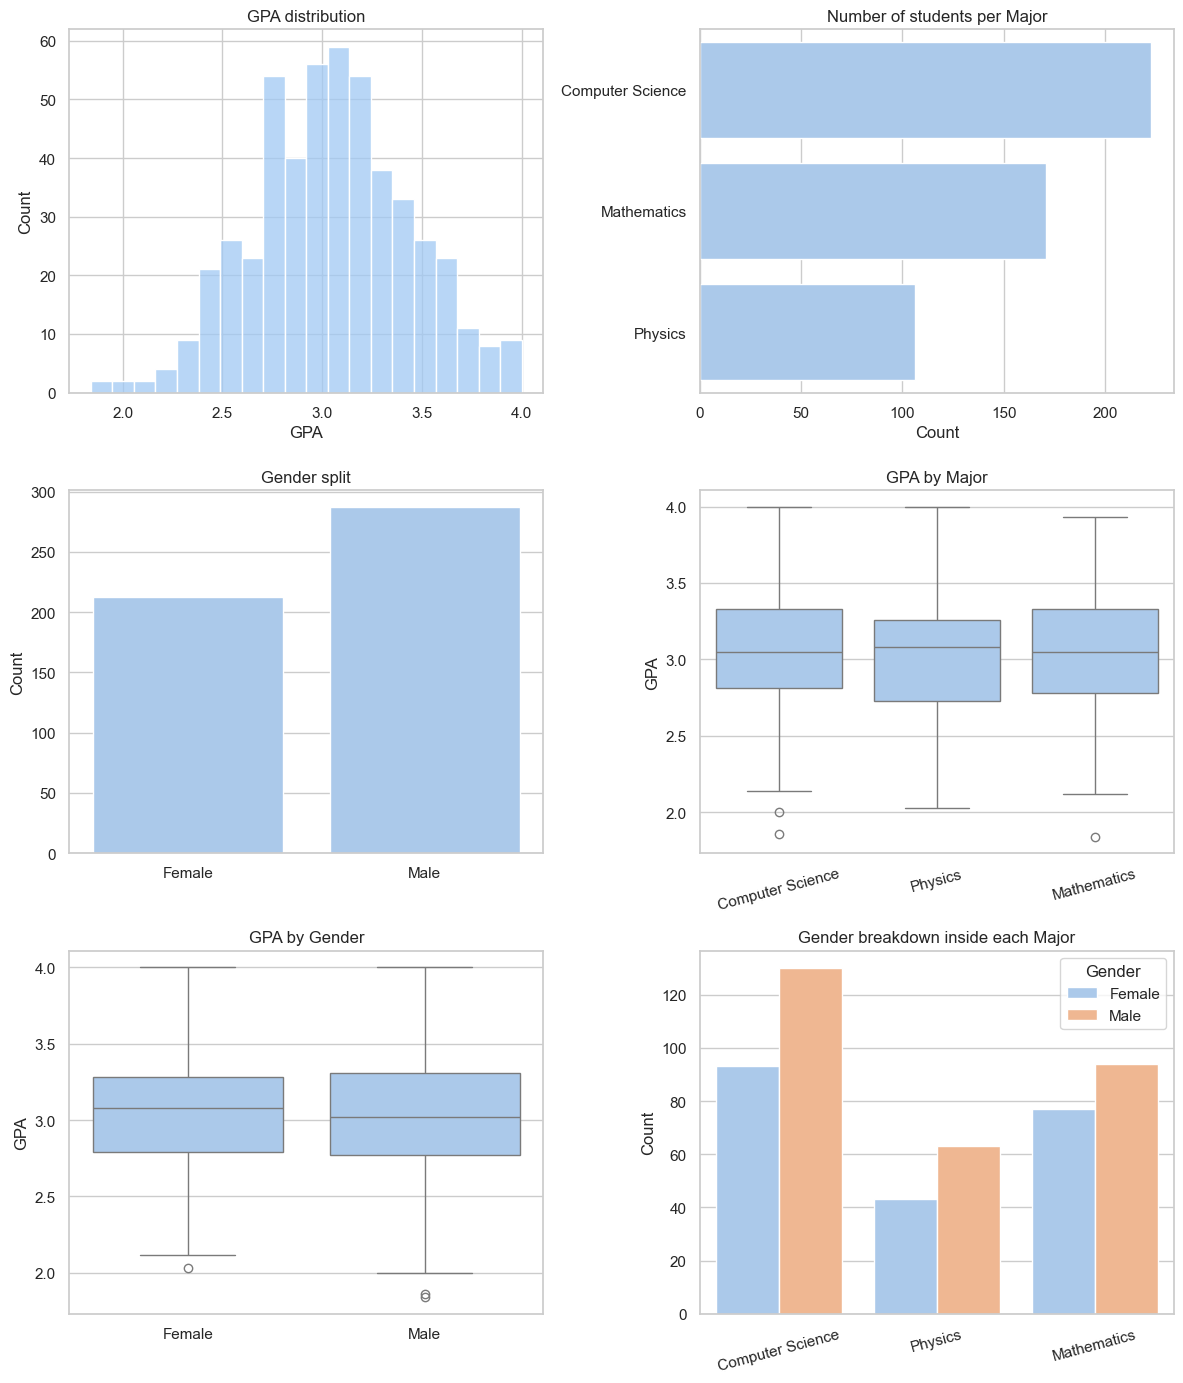

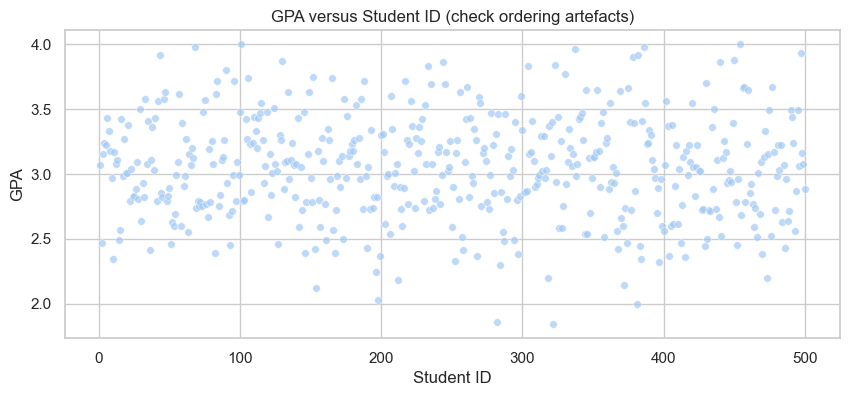

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. -----------------  synthetic data  -----------------
np.random.seed(42)

n = 500
df = pd.DataFrame({
    "StudentID": np.arange(1, n+1),
    "Major": np.random.choice(["Computer Science", "Mathematics", "Physics"], size=n, p=[0.45, 0.35, 0.20]),
    "Gender": np.random.choice(["Male", "Female"], size=n, p=[0.55, 0.45]),
    "GPA": np.clip(np.random.normal(loc=3.0, scale=0.4, size=n), 0, 4).round(2)
})

print(df.head())

# Matplotlib style
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.ravel()

# GPA histogram
sns.histplot(df["GPA"], bins=20, ax=axes[0])
axes[0].set(title="GPA distribution", xlabel="GPA", ylabel="Count")

# Major bar chart
sns.countplot(y="Major", data=df, order=df["Major"].value_counts().index, ax=axes[1])
axes[1].set(title="Number of students per Major", ylabel="", xlabel="Count")

# Gender bar chart
sns.countplot(x="Gender", data=df, ax=axes[2])
axes[2].set(title="Gender split", xlabel="", ylabel="Count")

# GPA by Major
sns.boxplot(x="Major", y="GPA", data=df, ax=axes[3])
axes[3].set(title="GPA by Major", xlabel="", ylabel="GPA")
axes[3].tick_params(axis='x', rotation=15)

# GPA by Gender
sns.boxplot(x="Gender", y="GPA", data=df, ax=axes[4])
axes[4].set(title="GPA by Gender", xlabel="", ylabel="GPA")

# Gender balance within each Major (clustered bars)
sns.countplot(x="Major", hue="Gender", data=df, ax=axes[5])
axes[5].set(title="Gender breakdown inside each Major", xlabel="", ylabel="Count")
axes[5].tick_params(axis='x', rotation=15)
axes[5].legend(title="Gender")

fig.tight_layout()
plt.show()

# StudentID vs GPA
plt.figure(figsize=(10,4))
sns.scatterplot(x="StudentID", y="GPA", data=df, s=30, alpha=.7)
plt.title("GPA versus Student ID (check ordering artefacts)")
plt.xlabel("Student ID")
plt.ylabel("GPA")
plt.show()

3)

Major
Computer Science    223
Mathematics         171
Physics             106
Name: count, dtype: int64


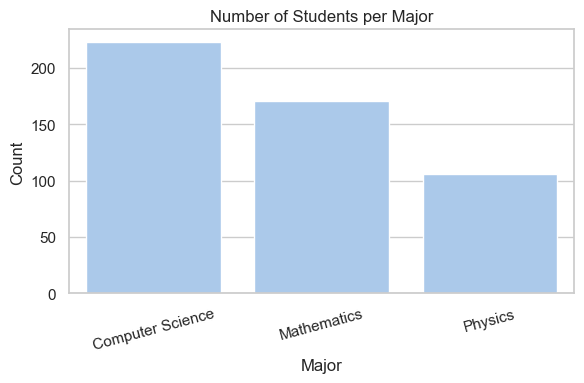

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣  Count students per major
major_counts = df["Major"].value_counts().sort_values(ascending=False)
print(major_counts)

# 2️⃣  Bar chart
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(6,4))
sns.barplot(x=major_counts.index, y=major_counts.values)
plt.title("Number of Students per Major")
plt.xlabel("Major")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

4)

Similarity matrix (rows = users, columns = items):
 [[0.143 0.288 0.081 0.428 0.061]
 [0.185 0.023 0.291 0.113 0.388]
 [0.037 0.046 0.138 0.043 0.736]
 [0.341 0.139 0.09  0.318 0.112]
 [0.39  0.197 0.266 0.11  0.036]]


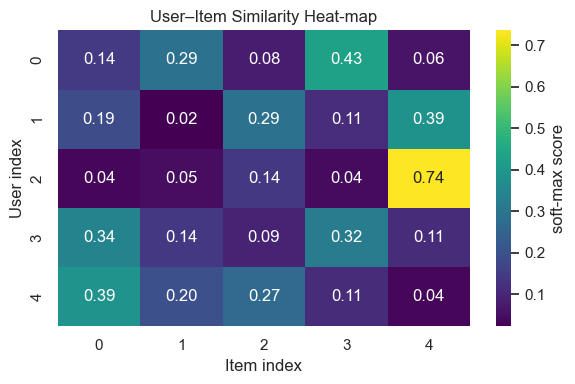

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Randomly initialise U and V
np.random.seed(42)
n_users  = n_items = 5
d = 8

U = np.random.randn(n_users, d)
V = np.random.randn(n_items, d)

# 2. Scaled dot-product
raw_scores = U @ V.T / np.sqrt(d)

# 3. Row-wise soft-max
exp_scores = np.exp(raw_scores)
similarity = exp_scores / exp_scores.sum(axis=1, keepdims=True)

print("Similarity matrix (rows = users, columns = items):\n",
      np.round(similarity, 3))

# 4. Heat-map visualisation
sns.set(style="white")
plt.figure(figsize=(6, 4))
ax = sns.heatmap(similarity,
                 annot=True, fmt=".2f",
                 cmap="viridis", cbar_kws={"label": "soft-max score"})
ax.set_xlabel("Item index")
ax.set_ylabel("User index")
ax.set_title("User–Item Similarity Heat-map")
plt.tight_layout()
plt.show()